In [1]:
import numpy as np
import matplotlib.pyplot as plt

## van Genuchten 

**Capillary pressure - saturation function**

Calculate first $\theta_e$:

$$ \theta_e = \left( 1 + \left( \alpha h \right)^n \right)^{-m} $$

With $m = 1 - 1/n$. Then, calculate the saturation:

$$ \theta = \theta_e \left( \theta_s - \theta_r \right) + \theta_r $$

## Mualem

**Relative permeability function**

With $\theta_e$, calculate:

$$ k_r = \sqrt{\theta_e} \left( 1 - \left( 1 - \left( \theta_e \right)^{1/m} \right) \right)^2 $$

In [2]:
## Globals
α = 2.7 #1/m
θs = 0.385
θr = 0.012
n = 7.26
m = 1 - 1/n

def vanGenuchten(h:np.array) -> np.array:
    θe = np.where(h >= 0.0, 1.0, np.power(1 + np.power(-α*h, n), -m))
    return θe

def waterSaturation(h:np.array) -> np.array:
    θe = vanGenuchten(h)
    θ = θe * (θs - θr) + θr
    return θ

def mualemPermeability(h:np.array) -> np.array:
    θe = vanGenuchten(h)
    kr = np.where(
        h >= 0,
        1.0,
        np.sqrt(θe) * np.power(1-np.power(1-np.power(θe, 1/m), m), 2))
    return kr

def capillarity(h) -> np.array:
    x = np.where(
        h >= 0,
        0.0,
        - m*n * np.power(-α*h, n) * vanGenuchten(h) / (h * (1 + np.power(-α*h, 2)))
        )
    x *= (θs - θr)
    return x

h = np.concatenate([np.geomspace(-2, -1.0E-3, 500), np.linspace(0, 2, 100)])
θe = vanGenuchten(h)
θ = waterSaturation(h)
kr = mualemPermeability(h)
Ch = capillarity(h)

/tmp/ipykernel_138860/2086598729.py:9: RuntimeWarning: invalid value encountered in power
  θe = np.where(h >= 0.0, 1.0, np.power(1 + np.power(-α*h, n), -m))
/tmp/ipykernel_138860/2086598729.py:29: RuntimeWarning: invalid value encountered in power
  - m*n * np.power(-α*h, n) * np.power(1 + np.power(-α*h, n), -m) / (h * (1 + np.power(-α*h, 2)))
/tmp/ipykernel_138860/2086598729.py:29: RuntimeWarning: invalid value encountered in divide
  - m*n * np.power(-α*h, n) * np.power(1 + np.power(-α*h, n), -m) / (h * (1 + np.power(-α*h, 2)))


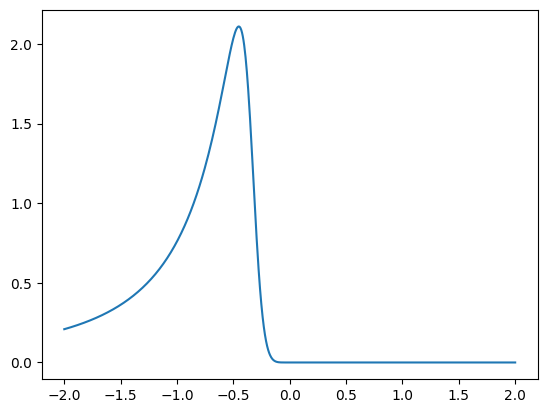

In [3]:
plt.plot(h,Ch)

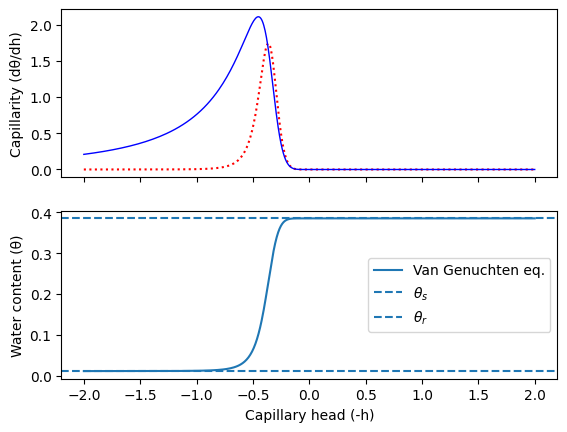

In [4]:
fig, axs = plt.subplots(2,1, sharex=True)
ax = axs[1]
ax.plot(h,θ, label="Van Genuchten eq.")
ax.axhline(y=θs, ls='dashed', label=r"$\theta_s$")
ax.axhline(y=θr, ls='dashed', label=r"$\theta_r$")
ax.set_xlabel("Capillary head (-h)")
ax.set_ylabel("Water content (θ)")
ax.legend()

ax = axs[0]
ax.plot(h, np.gradient(θ,h), ls='dotted', c='red', label="Numerical")
ax.plot(h, Ch, lw=1, c='blue', label="Analytical")
ax.set_ylabel("Capillarity (dθ/dh)")

plt.show()

In [8]:
## Globals
α = 2.7 #1/m
θs = 0.385
θr = 0.012
n = 7.26
m = 1 - 1/n

def vanGenuchten(h:np.array) -> np.array:
    θe = np.power(1 + np.power(-α*h, n), -m)
    return θe

def waterSaturation(h:np.array) -> np.array:
    θe = vanGenuchten(h)
    θ = θe * (θs - θr) + θr
    return θ

def mualemPermeability(h:np.array) -> np.array:
    θe = vanGenuchten(h)
    kr = np.sqrt(θe) * np.power(1-np.power(1-np.power(θe, 1/m), m), 2)
    return kr

def capillarity(h) -> np.array:
    θe = vanGenuchten(h)
    x =  α*m*n * np.power(-α*h, n-1) * np.power(1 + np.power(-α*h, n), -m-1)
    x *= (θs - θr)
    return x

h = np.concatenate([np.geomspace(-2, -1.0E-3, 500)])
θe = vanGenuchten(h)
θ = waterSaturation(h)
kr = mualemPermeability(h)
Ch = capillarity(h)

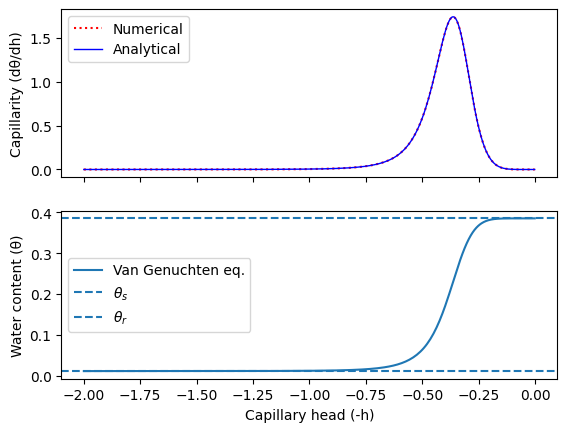

In [9]:
fig, axs = plt.subplots(2,1, sharex=True)
ax = axs[1]
ax.plot(h,θ, label="Van Genuchten eq.")
ax.axhline(y=θs, ls='dashed', label=r"$\theta_s$")
ax.axhline(y=θr, ls='dashed', label=r"$\theta_r$")
ax.set_xlabel("Capillary head (-h)")
ax.set_ylabel("Water content (θ)")
ax.legend()

ax = axs[0]
ax.plot(h, np.gradient(θ,h), ls='dotted', c='red', label="Numerical")
ax.plot(h, Ch, lw=1, c='blue', label="Analytical")
ax.set_ylabel("Capillarity (dθ/dh)")
ax.legend()
plt.show()